## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  83.756358   878.852073  0.583162  6.854560  1.446924
1  55.400750   547.962663  0.201077  6.455766  0.951549
2  21.366543  1523.251558  0.816981  6.182502  1.545125
3  77.265622   606.430247  0.828203  3.609026  1.460145
4  78.031934  1171.749008  0.903336  2.559036  1.522895


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0572430	total: 56.6ms	remaining: 56.5s


1:	learn: 1.0477754	total: 57.5ms	remaining: 28.7s
2:	learn: 1.0389585	total: 58.1ms	remaining: 19.3s
3:	learn: 1.0299573	total: 59.4ms	remaining: 14.8s
4:	learn: 1.0198493	total: 60.3ms	remaining: 12s
5:	learn: 1.0122674	total: 61.1ms	remaining: 10.1s
6:	learn: 1.0030588	total: 62.4ms	remaining: 8.85s
7:	learn: 0.9941883	total: 63.4ms	remaining: 7.87s
8:	learn: 0.9845799	total: 64.7ms	remaining: 7.12s
9:	learn: 0.9748030	total: 65.4ms	remaining: 6.48s
10:	learn: 0.9664973	total: 67ms	remaining: 6.02s
11:	learn: 0.9575492	total: 69.4ms	remaining: 5.72s
12:	learn: 0.9494939	total: 70.7ms	remaining: 5.37s
13:	learn: 0.9420157	total: 71.6ms	remaining: 5.04s
14:	learn: 0.9335611	total: 72.3ms	remaining: 4.74s
15:	learn: 0.9247851	total: 73.1ms	remaining: 4.5s
16:	learn: 0.9152953	total: 73.4ms	remaining: 4.24s
17:	learn: 0.9081592	total: 74.3ms	remaining: 4.05s
18:	learn: 0.9013431	total: 75.3ms	remaining: 3.89s
19:	learn: 0.8944047	total: 76ms	remaining: 3.72s
20:	learn: 0.8855502	total: 

98:	learn: 0.4992532	total: 154ms	remaining: 1.4s
99:	learn: 0.4962075	total: 155ms	remaining: 1.39s
100:	learn: 0.4940172	total: 155ms	remaining: 1.38s
101:	learn: 0.4906942	total: 156ms	remaining: 1.37s
102:	learn: 0.4872145	total: 157ms	remaining: 1.37s
103:	learn: 0.4840928	total: 158ms	remaining: 1.36s
104:	learn: 0.4815540	total: 158ms	remaining: 1.35s
105:	learn: 0.4781369	total: 159ms	remaining: 1.34s
106:	learn: 0.4753264	total: 159ms	remaining: 1.33s
107:	learn: 0.4727022	total: 160ms	remaining: 1.32s
108:	learn: 0.4701897	total: 160ms	remaining: 1.31s
109:	learn: 0.4674826	total: 161ms	remaining: 1.3s
110:	learn: 0.4647158	total: 162ms	remaining: 1.29s
111:	learn: 0.4621296	total: 162ms	remaining: 1.29s
112:	learn: 0.4602279	total: 163ms	remaining: 1.28s
113:	learn: 0.4573289	total: 165ms	remaining: 1.28s
114:	learn: 0.4551223	total: 166ms	remaining: 1.27s
115:	learn: 0.4524362	total: 166ms	remaining: 1.27s
116:	learn: 0.4494750	total: 168ms	remaining: 1.27s
117:	learn: 0.44

146:	learn: 0.3831854	total: 207ms	remaining: 1.2s
147:	learn: 0.3812607	total: 210ms	remaining: 1.21s
148:	learn: 0.3796789	total: 212ms	remaining: 1.21s
149:	learn: 0.3775389	total: 212ms	remaining: 1.2s
150:	learn: 0.3759150	total: 213ms	remaining: 1.2s
151:	learn: 0.3740550	total: 214ms	remaining: 1.19s
152:	learn: 0.3719227	total: 215ms	remaining: 1.19s
153:	learn: 0.3703382	total: 215ms	remaining: 1.18s
154:	learn: 0.3684929	total: 216ms	remaining: 1.18s
155:	learn: 0.3667913	total: 217ms	remaining: 1.17s
156:	learn: 0.3651059	total: 217ms	remaining: 1.17s
157:	learn: 0.3631195	total: 218ms	remaining: 1.16s
158:	learn: 0.3612905	total: 218ms	remaining: 1.15s
159:	learn: 0.3590872	total: 219ms	remaining: 1.15s
160:	learn: 0.3576268	total: 219ms	remaining: 1.14s
161:	learn: 0.3556170	total: 220ms	remaining: 1.14s
162:	learn: 0.3535693	total: 220ms	remaining: 1.13s
163:	learn: 0.3519540	total: 221ms	remaining: 1.13s
164:	learn: 0.3502965	total: 223ms	remaining: 1.13s
165:	learn: 0.3

191:	learn: 0.3101105	total: 271ms	remaining: 1.14s
192:	learn: 0.3083542	total: 271ms	remaining: 1.13s
193:	learn: 0.3075674	total: 272ms	remaining: 1.13s
194:	learn: 0.3066930	total: 272ms	remaining: 1.12s
195:	learn: 0.3053735	total: 273ms	remaining: 1.12s
196:	learn: 0.3043593	total: 273ms	remaining: 1.11s
197:	learn: 0.3028557	total: 274ms	remaining: 1.11s
198:	learn: 0.3014201	total: 275ms	remaining: 1.11s
199:	learn: 0.3000782	total: 276ms	remaining: 1.1s
200:	learn: 0.2992798	total: 276ms	remaining: 1.1s
201:	learn: 0.2983889	total: 277ms	remaining: 1.09s
202:	learn: 0.2968873	total: 277ms	remaining: 1.09s
203:	learn: 0.2956940	total: 278ms	remaining: 1.08s
204:	learn: 0.2946940	total: 278ms	remaining: 1.08s
205:	learn: 0.2939995	total: 279ms	remaining: 1.07s
206:	learn: 0.2925869	total: 279ms	remaining: 1.07s
207:	learn: 0.2914143	total: 281ms	remaining: 1.07s
208:	learn: 0.2904739	total: 281ms	remaining: 1.06s
209:	learn: 0.2898255	total: 282ms	remaining: 1.06s
210:	learn: 0.

241:	learn: 0.2523155	total: 315ms	remaining: 988ms
242:	learn: 0.2513858	total: 316ms	remaining: 986ms
243:	learn: 0.2502050	total: 317ms	remaining: 982ms
244:	learn: 0.2490928	total: 318ms	remaining: 979ms
245:	learn: 0.2484571	total: 318ms	remaining: 975ms
246:	learn: 0.2476076	total: 319ms	remaining: 972ms
247:	learn: 0.2459466	total: 319ms	remaining: 968ms
248:	learn: 0.2454786	total: 320ms	remaining: 965ms
249:	learn: 0.2449938	total: 320ms	remaining: 961ms
250:	learn: 0.2440690	total: 321ms	remaining: 958ms
251:	learn: 0.2433605	total: 321ms	remaining: 954ms
252:	learn: 0.2424372	total: 322ms	remaining: 950ms
253:	learn: 0.2417328	total: 322ms	remaining: 947ms
254:	learn: 0.2412075	total: 323ms	remaining: 943ms
255:	learn: 0.2407705	total: 323ms	remaining: 939ms
256:	learn: 0.2396487	total: 324ms	remaining: 936ms
257:	learn: 0.2388738	total: 325ms	remaining: 936ms
258:	learn: 0.2382335	total: 326ms	remaining: 933ms
259:	learn: 0.2374926	total: 327ms	remaining: 930ms
260:	learn: 

444:	learn: 0.1223922	total: 419ms	remaining: 523ms
445:	learn: 0.1220331	total: 421ms	remaining: 523ms
446:	learn: 0.1218361	total: 422ms	remaining: 522ms
447:	learn: 0.1214775	total: 423ms	remaining: 521ms
448:	learn: 0.1212840	total: 424ms	remaining: 520ms
449:	learn: 0.1209862	total: 424ms	remaining: 519ms
450:	learn: 0.1207440	total: 425ms	remaining: 517ms
451:	learn: 0.1201750	total: 426ms	remaining: 516ms
452:	learn: 0.1197148	total: 426ms	remaining: 515ms
453:	learn: 0.1191589	total: 427ms	remaining: 513ms
454:	learn: 0.1186143	total: 427ms	remaining: 512ms
455:	learn: 0.1181197	total: 428ms	remaining: 511ms
456:	learn: 0.1178902	total: 428ms	remaining: 509ms
457:	learn: 0.1174753	total: 429ms	remaining: 507ms
458:	learn: 0.1169487	total: 429ms	remaining: 506ms
459:	learn: 0.1164703	total: 430ms	remaining: 505ms
460:	learn: 0.1158459	total: 431ms	remaining: 503ms
461:	learn: 0.1152705	total: 431ms	remaining: 502ms
462:	learn: 0.1148628	total: 432ms	remaining: 501ms
463:	learn: 

482:	learn: 0.1067364	total: 448ms	remaining: 479ms
483:	learn: 0.1063111	total: 478ms	remaining: 509ms
484:	learn: 0.1058634	total: 478ms	remaining: 508ms
485:	learn: 0.1055814	total: 479ms	remaining: 506ms
486:	learn: 0.1053400	total: 479ms	remaining: 505ms
487:	learn: 0.1049242	total: 480ms	remaining: 504ms
488:	learn: 0.1047028	total: 481ms	remaining: 502ms
489:	learn: 0.1042631	total: 481ms	remaining: 501ms
490:	learn: 0.1039722	total: 481ms	remaining: 499ms
491:	learn: 0.1035702	total: 482ms	remaining: 498ms
492:	learn: 0.1031391	total: 483ms	remaining: 496ms
493:	learn: 0.1028684	total: 483ms	remaining: 495ms
494:	learn: 0.1024460	total: 487ms	remaining: 497ms
495:	learn: 0.1021376	total: 488ms	remaining: 496ms
496:	learn: 0.1019049	total: 488ms	remaining: 494ms
497:	learn: 0.1016032	total: 489ms	remaining: 493ms
498:	learn: 0.1013841	total: 490ms	remaining: 492ms
499:	learn: 0.1011896	total: 490ms	remaining: 490ms
500:	learn: 0.1008999	total: 491ms	remaining: 489ms
501:	learn: 

611:	learn: 0.0766258	total: 557ms	remaining: 353ms
612:	learn: 0.0764354	total: 557ms	remaining: 352ms
613:	learn: 0.0762484	total: 558ms	remaining: 351ms
614:	learn: 0.0760478	total: 559ms	remaining: 350ms
615:	learn: 0.0758625	total: 559ms	remaining: 349ms
616:	learn: 0.0756799	total: 560ms	remaining: 347ms
617:	learn: 0.0754843	total: 560ms	remaining: 346ms
618:	learn: 0.0753030	total: 561ms	remaining: 345ms
619:	learn: 0.0752344	total: 561ms	remaining: 344ms
620:	learn: 0.0751408	total: 562ms	remaining: 343ms
621:	learn: 0.0750607	total: 562ms	remaining: 342ms
622:	learn: 0.0747776	total: 563ms	remaining: 340ms
623:	learn: 0.0746596	total: 563ms	remaining: 339ms
624:	learn: 0.0744605	total: 563ms	remaining: 338ms
625:	learn: 0.0740845	total: 564ms	remaining: 337ms
626:	learn: 0.0739317	total: 564ms	remaining: 336ms
627:	learn: 0.0737463	total: 565ms	remaining: 334ms
628:	learn: 0.0735600	total: 565ms	remaining: 333ms
629:	learn: 0.0733858	total: 565ms	remaining: 332ms
630:	learn: 

684:	learn: 0.0618326	total: 590ms	remaining: 272ms
685:	learn: 0.0617767	total: 592ms	remaining: 271ms
686:	learn: 0.0617379	total: 594ms	remaining: 271ms
687:	learn: 0.0616997	total: 595ms	remaining: 270ms
688:	learn: 0.0616621	total: 595ms	remaining: 269ms
689:	learn: 0.0616077	total: 596ms	remaining: 268ms
690:	learn: 0.0614853	total: 596ms	remaining: 267ms
691:	learn: 0.0611996	total: 597ms	remaining: 266ms
692:	learn: 0.0611464	total: 597ms	remaining: 265ms
693:	learn: 0.0608673	total: 598ms	remaining: 263ms
694:	learn: 0.0608154	total: 598ms	remaining: 262ms
695:	learn: 0.0605003	total: 598ms	remaining: 261ms
696:	learn: 0.0603805	total: 599ms	remaining: 260ms
697:	learn: 0.0603296	total: 599ms	remaining: 259ms
698:	learn: 0.0600645	total: 600ms	remaining: 258ms
699:	learn: 0.0600149	total: 600ms	remaining: 257ms
700:	learn: 0.0599061	total: 600ms	remaining: 256ms
701:	learn: 0.0598575	total: 601ms	remaining: 255ms
702:	learn: 0.0597422	total: 601ms	remaining: 254ms
703:	learn: 

901:	learn: 0.0366679	total: 710ms	remaining: 77.1ms
902:	learn: 0.0364982	total: 713ms	remaining: 76.6ms
903:	learn: 0.0364641	total: 713ms	remaining: 75.8ms
904:	learn: 0.0362988	total: 714ms	remaining: 74.9ms
905:	learn: 0.0362776	total: 714ms	remaining: 74.1ms
906:	learn: 0.0362441	total: 715ms	remaining: 73.3ms
907:	learn: 0.0361226	total: 715ms	remaining: 72.5ms
908:	learn: 0.0361019	total: 716ms	remaining: 71.7ms
909:	learn: 0.0360689	total: 716ms	remaining: 70.8ms
910:	learn: 0.0359502	total: 717ms	remaining: 70ms
911:	learn: 0.0358344	total: 717ms	remaining: 69.2ms
912:	learn: 0.0358016	total: 718ms	remaining: 68.4ms
913:	learn: 0.0357764	total: 718ms	remaining: 67.6ms
914:	learn: 0.0356943	total: 719ms	remaining: 66.8ms
915:	learn: 0.0356622	total: 719ms	remaining: 66ms
916:	learn: 0.0356087	total: 720ms	remaining: 65.1ms
917:	learn: 0.0354969	total: 720ms	remaining: 64.3ms
918:	learn: 0.0353780	total: 721ms	remaining: 63.5ms
919:	learn: 0.0352636	total: 721ms	remaining: 62.7

967:	learn: 0.0319166	total: 748ms	remaining: 24.7ms
968:	learn: 0.0318387	total: 749ms	remaining: 23.9ms
969:	learn: 0.0317658	total: 751ms	remaining: 23.2ms
970:	learn: 0.0315621	total: 752ms	remaining: 22.4ms
971:	learn: 0.0313623	total: 752ms	remaining: 21.7ms
972:	learn: 0.0313344	total: 753ms	remaining: 20.9ms
973:	learn: 0.0313069	total: 753ms	remaining: 20.1ms
974:	learn: 0.0311688	total: 754ms	remaining: 19.3ms
975:	learn: 0.0311415	total: 754ms	remaining: 18.5ms
976:	learn: 0.0311147	total: 755ms	remaining: 17.8ms
977:	learn: 0.0310883	total: 755ms	remaining: 17ms
978:	learn: 0.0310622	total: 756ms	remaining: 16.2ms
979:	learn: 0.0309264	total: 756ms	remaining: 15.4ms
980:	learn: 0.0309006	total: 756ms	remaining: 14.6ms
981:	learn: 0.0308751	total: 757ms	remaining: 13.9ms
982:	learn: 0.0308500	total: 757ms	remaining: 13.1ms
983:	learn: 0.0308253	total: 758ms	remaining: 12.3ms
984:	learn: 0.0306918	total: 758ms	remaining: 11.5ms
985:	learn: 0.0306673	total: 759ms	remaining: 10

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.30323636299147766


ABC Pre-generator MAE 0.34196401941319887


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

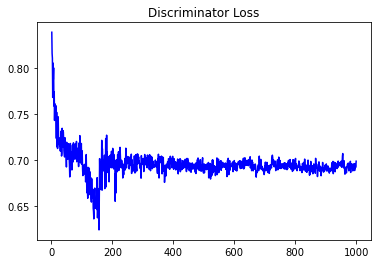

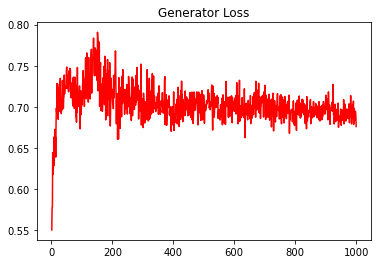

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.47360113795753567


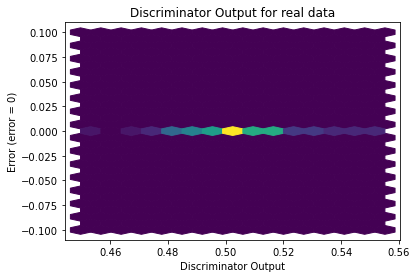

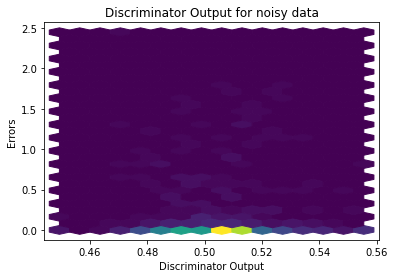

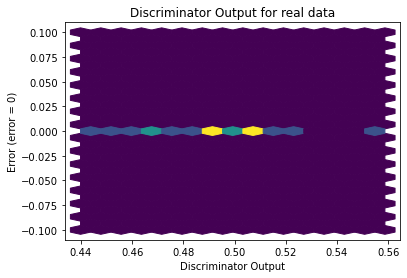

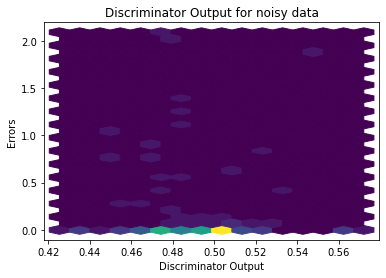

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

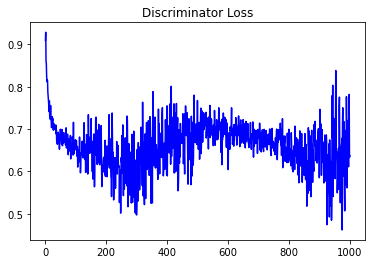

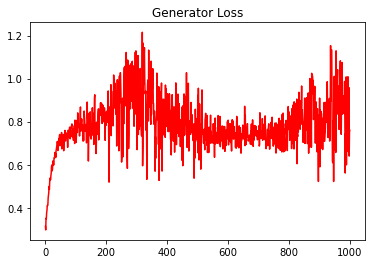

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
1.6737452767686918


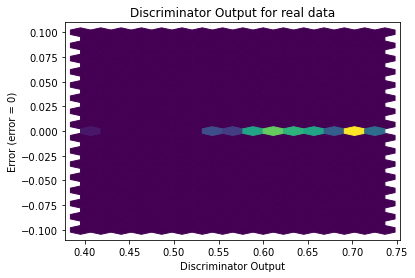

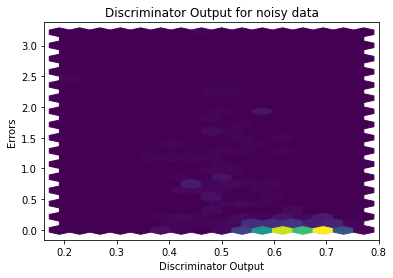

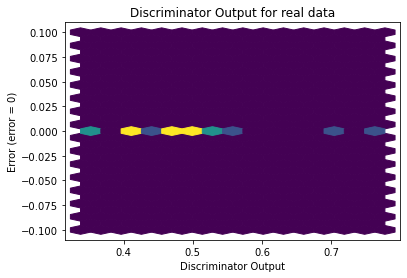

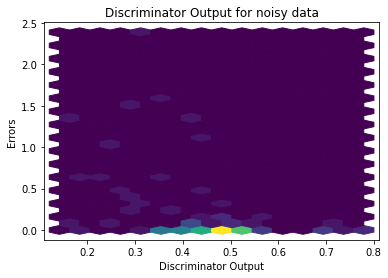

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


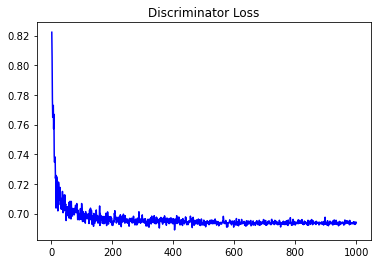

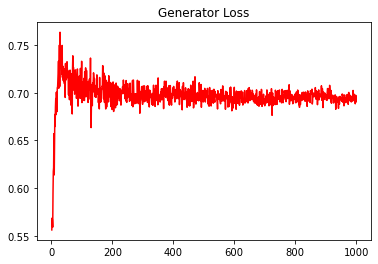

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.3158011746443808


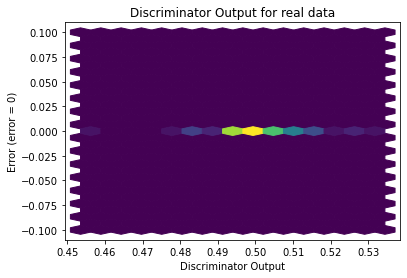

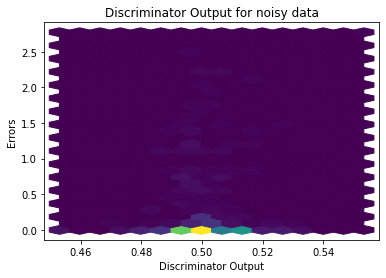

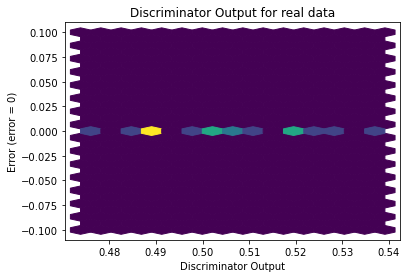

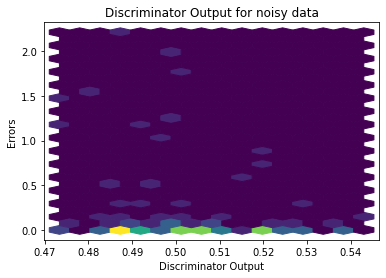

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


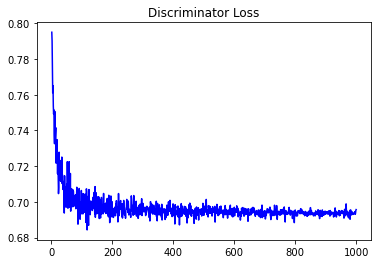

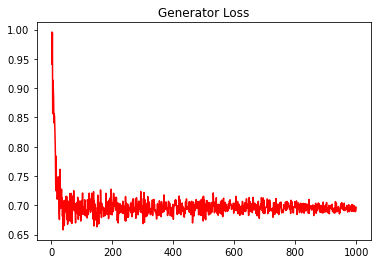

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.3188085524851922


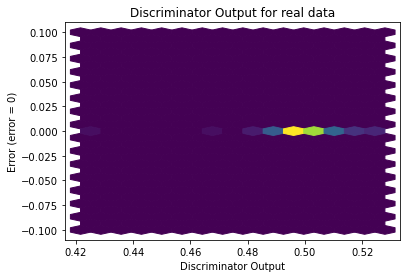

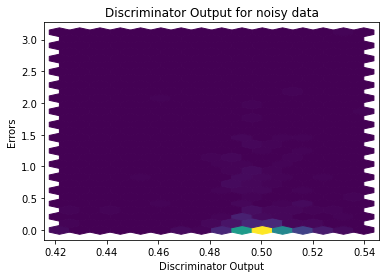

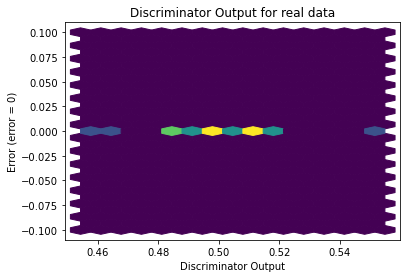

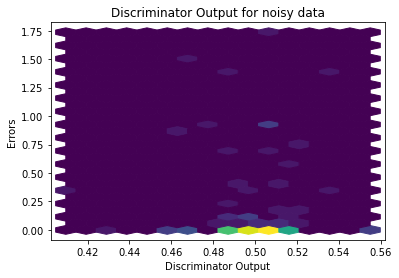

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0955]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0678]], requires_grad=True)
